# Libraries Imported

In [168]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

This code installs the fastbook library (if it isn't already installed) and sets it up for use in the current environment. The ! at the beginning of the first line is used to run the command in a shell, rather than in the Python interpreter. The pip install -Uqq fastbook command installs the fastbook library, and the -U flag tells pip to upgrade any existing version of the package, while qq is used to suppress output. The import fastbook line imports the library into the current script, and the fastbook.setup_book() function is used to set up and configure the library for use in the current environment.

In [169]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

This code imports necessary modules from the fastai library and the fastbook library, which are used for machine learning and deep learning tasks in computer vision. It also sets the color map for images in matplotlib to "Greys", meaning that images will be displayed in shades of gray.

In [170]:
path = untar_data(URLs.MNIST_SAMPLE)

The code is using the function "untar_data" to extract a dataset located at the URL "URLs.MNIST_SAMPLE" and storing the resulting file path in the variable "path". This dataset is the MNIST sample dataset, which is a commonly used dataset for machine learning and computer vision tasks that consists of handwritten digits.

In [171]:
#hide
Path.BASE_PATH = path

This code is setting a variable called "BASE_PATH" within the "Path" class to the value of the "path" variable

In [172]:
path.ls()

(#3) [Path('train'),Path('valid'),Path('labels.csv')]

In [173]:
(path/'train').ls()

(#2) [Path('train/3'),Path('train/7')]

In [174]:
#image paths loaded into lists and sorted
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

The code first uses the path.ls() and (path/'train').ls() commands to list the contents of the "path" and "train" directories. It then creates lists of the file paths for the "3" and "7" images in the "train" set using the (path/'train'/'3').ls().sorted() and (path/'train'/'7').ls().sorted() commands.


In [175]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [176]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [177]:
tensor(im3)[4:10,4:10]


tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [178]:
#Image visual
im3_t = tensor(im3)
df = pd.DataFrame(im3_t)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0,0,0,0,0,0,0


The section of the image used is the 4th to 15th rows and the 4th to 22nd columns. The dataframe is then styled with a font size of 6 points and a background gradient of greys.


<img width="453" id="output_pd_pixels" src="images/att_00058.png">

In [179]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

Next, the code creates tensors (i.e. multi-dimensional arrays) for each of the images in the "3" and "7" lists using the tensor(Image.open(o)) command. It also calculates the mean image for each class (i.e. "3" and "7") by averaging the tensors in the corresponding list using the .mean(0) command.


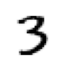

In [180]:
show_image(three_tensors[1]);

In [181]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

This is to stack and normalize two groups of tensors, "seven_tensors" and "three_tensors."

First, the "seven_tensors" are stacked using the "torch.stack()" function, and then they are converted to float data type using the ".float()" method. Finally, the data is divided by 255, which is a common way to normalize image data.

The same process is then repeated for the "three_tensors."

Finally, the shape of the "stacked_threes" tensor is checked using the ".shape" attribute. This will return the dimensions of the tensor, such as (number of tensors stacked, height, width, number of channels).

In [182]:
len(stacked_threes.shape)

3

In [183]:
stacked_threes.ndim

3

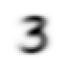

In [184]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

The code is calculating the mean (average) of all the images in the "stacked_threes" variable and storing it in a new variable called "mean3". It then uses the "show_image" function to display the "mean3" image.

The reason the image is blurry is because the mean image is created by taking the average of all the images in "stacked_threes". When you take the average of multiple images, you lose some of the details from each individual image. This results in a blurrier image, as the final image is a combination of all the images in "stacked_threes".

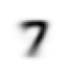

In [185]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

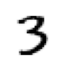

In [186]:
a_3 = stacked_threes[1]
show_image(a_3);

In [187]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs,dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [188]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [189]:
F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3,mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

The code then calculates the distance between a single "3" image (a_3) and the mean "3" and "7" images using the (a_3 - mean3).abs().mean() and ((a_3 - mean3)**2).mean().sqrt() commands. It also uses the F.l1_loss(a_3.float(),mean7) and F.mse_loss(a_3,mean7).sqrt() commands to calculate the L1 loss and mean squared error between a_3 and the mean "7" image.


In [190]:
data = [[1,2,3],[4,5,6]]
arr = array (data)
tns = tensor(data)

In [191]:
arr  # numpy

array([[1, 2, 3],
       [4, 5, 6]])

In [192]:
tns  # pytorch

tensor([[1, 2, 3],
        [4, 5, 6]])

In [193]:
tns[1]

tensor([4, 5, 6])

In [194]:
tns[:,1]

tensor([2, 5])

In [195]:
tns[1,1:3]

tensor([5, 6])

In [196]:
tns+1

tensor([[2, 3, 4],
        [5, 6, 7]])

In [197]:
tns.type()

'torch.LongTensor'

In [198]:
tns*1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

In [199]:
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

The code uses the "ls()" function to list all the images in the corresponding subfolders, and then uses a for loop to open each image and add it to the tensor. The tensor is then stacked using the torch.stack function. This function concatenates the sequence of tensors along a new dimension (the first dimension by default).

After the tensors are created, the code normalizes the data by dividing each value by 255, which is the maximum value for a pixel in an image. Finally, the code displays the shape of the tensors for the 3's and 7's to confirm that the tensors have been created correctly.

In [200]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

tensor(0.1114)

In [201]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1318, 0.1750, 0.1230,  ..., 0.1304, 0.1173, 0.1099]),
 torch.Size([1010]))

In [202]:
tensor([1,2,3]) + tensor(1)

tensor([2, 3, 4])

In [203]:
(valid_3_tens-mean3).shape

torch.Size([1010, 28, 28])

In [204]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

In [205]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [206]:
is_3(valid_3_tens)

tensor([ True, False,  True,  ..., False,  True,  True])

The code then defines a function mnist_distance(a,b) that calculates the average absolute difference between two images, and uses it to calculate the distance between the "3" images in the "valid" set and the mean "3" image. It also defines a function is_3(x) that compares the distance between an image and the mean "3" image to the distance between that image and the mean "7" image, and returns whether the image is more likely to be a "3" or a "7".


Now we can calculate the accuracy for each of the 3s and 7s by taking the average of that function for all 3s and its inverse for all 7s:

In [207]:
accuracy_3s =      is_3(valid_3_tens).float() .mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

The code is calculating the accuracy of a model that is identifying 3s and 7s in images. The variable "is_3" is likely a function or model that takes in an image and returns a binary value indicating whether or not the image contains a 3.

The first line calculates the accuracy of the model in identifying 3s. It first calls the "is_3" function on the dataset of valid images of 3s (valid_3_tens). The resulting binary values are then converted to floats and the mean is calculated, giving the overall accuracy of the model in identifying 3s.

The second line calculates the accuracy of the model in identifying 7s. It first calls the "is_3" function on the dataset of valid images of 7s (valid_7_tens). The resulting binary values are then negated and converted to floats. The mean is then calculated, giving the overall accuracy of the model in identifying 7s.

The final line calculates the average accuracy of the model in identifying both 3s and 7s by taking the average of the accuracy of 3s and 7s.





## Stochastic Gradient Descent (SGD)

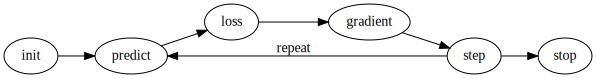

In [208]:
#id gradient_descent
#caption The gradient descent process
#alt Graph showing the steps for Gradient Descent
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

This code is demonstrating the process of Stochastic Gradient Descent (SGD), which is a method used in machine learning to optimize a model's parameters by iteratively adjusting them in the direction that minimizes the loss function.
The code starts by creating a flowchart using the Graphviz library (gv) to illustrate the steps of the gradient descent process. It starts with initializing parameters, then predicting based on those parameters, calculating the loss, finding the gradient, taking a step to update the parameters, and repeating the process until a stopping criterion is met.

In [209]:
def f(x): return x**2

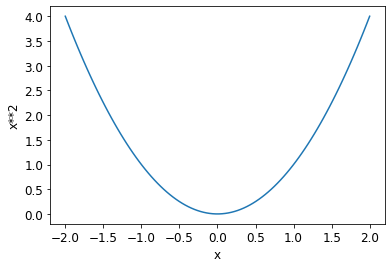

In [210]:
plot_function(f, 'x', 'x**2')

the code defines a simple function, f(x) = x^2, and plots it using the plot_function() function. It then adds a scatter point at (-1.5, f(-1.5)) to the plot to illustrate the slope at that point.

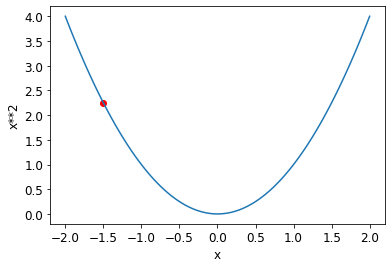

In [211]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red');

<img alt="A graph showing the squared function with the slope at one point" width="400" src="images/grad_illustration.svg"/>

The graph is showing a representation of the squared function, which is a mathematical function that takes a number as input and squares it (multiplies it by itself).

The slope is shown by the angle of the line at one point, represented by the red arrow. The slope at this point is 1, which means that for every 1 unit increase in the input (x-axis), there is a corresponding 1 unit increase in the output (y-axis). As the input value increases, the slope of the line becomes steeper, indicating that the output value is increasing at a faster rate.

### Calculating Gradients

In [212]:
xt = tensor(3.).requires_grad_()

In [213]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [214]:
yt.backward()

In [215]:
xt.grad

tensor(6.)

In [216]:
xt = tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [217]:
def f(x): return (x**2).sum()

yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [218]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

The code then goes on to calculate gradients using PyTorch tensors. It starts by creating a tensor with a single value of 3, and then calculates the output of the function f() at that point. It then uses the .backward() method to calculate the gradient of the function at that point.


In [219]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

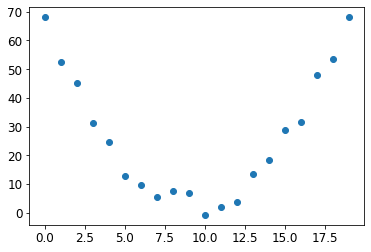

In [220]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

The x-axis represents the time and the y-axis represents the speed. The points on the scatter plot are randomly generated based on a normal distribution with a mean of 0 and a standard deviation of 3, plus an additional term that is a quadratic function of the time with a coefficient of 0.75 and a constant term of 1. This means that the points on the scatter plot are distributed around a curve that is a parabola with a vertex at (9.5, 1) and a positive coefficient, indicating that the speed increases as the time increases. The randomness of the normal distribution causes the points to be scattered around the curve, rather than being perfectly aligned with it.





The code then repeats the process with a tensor of multiple values, and a different function, f(x) = (x^2).sum().


In [221]:
#parameters
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [222]:
def mse(preds, targets): return ((preds-targets)**2).mean().sqrt()

In [223]:
params = torch.randn(3).requires_grad_()

The code then creates a random dataset of time and speed values, and plots them. It then defines a new function f(t, params) and a mean squared error (mse) function. It creates a set of random parameters, and uses them to make predictions using the f(t,params) function. The code then calculates the loss using the mse function and the actual speed values. It then uses the .backward() method to calculate the gradients and updates the parameters using the calculated gradients and a learning rate of 1e-5.


In [224]:

orig_params = params.clone()

In [225]:
#predictions calculated
preds = f(time, params)

In [226]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

The code then repeats the above process for 10 iterations and plots the final predictions. It also shows the predictions at different stages of the training process in a subplot.

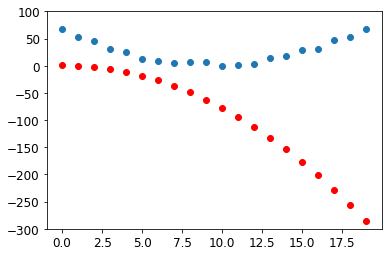

In [227]:
show_preds(preds)

In [228]:
#loss calculated
loss = mse(preds, speed)
loss

tensor(157.5862, grad_fn=<SqrtBackward0>)

In [229]:
#gradients calculated
loss.backward()
params.grad

tensor([-165.6709,  -10.6075,   -0.7798])

In [230]:
params.grad * 1e-5

tensor([-1.6567e-03, -1.0607e-04, -7.7976e-06])

In [231]:
params

tensor([-0.8087,  0.3171,  0.4715], requires_grad=True)

In [232]:
#step the weights
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [233]:
preds = f(time,params)
mse(preds, speed)

tensor(157.3106, grad_fn=<SqrtBackward0>)

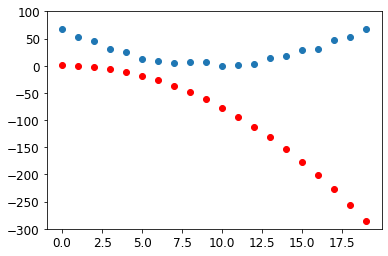

In [234]:
show_preds(preds)

In [235]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [236]:
#repeating the process
for i in range(10): apply_step(params)

157.31063842773438
157.03506469726562
156.759521484375
156.48397827148438
156.20851135253906
155.93301391601562
155.65757751464844
155.3821563720703
155.10675048828125
154.8313751220703


In [237]:

params = orig_params.detach().requires_grad_()

The loss is going down, similarly as we trusted! In any case, taking a gander at these loss numbers masks the way that every emphasis addresses a completely unique quadratic function being attempted, headed to tracking down the most ideal quadratic function. We can see this interaction outwardly if, rather than printing out the loss function, we plot the function at each step. Then we can perceive how the shape is moving toward the most ideal quadratic function for our information:

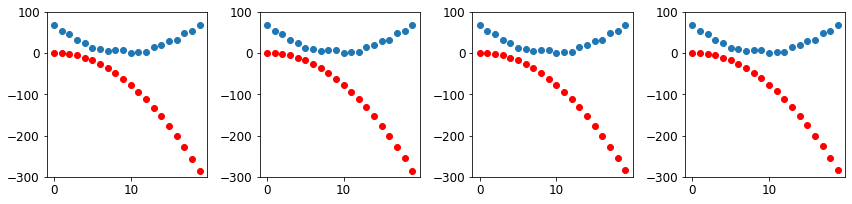

In [238]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

### Summarizing Gradient Descent

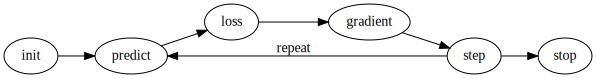

In [239]:
#stop
#id gradient_descent
#caption The gradient descent process
#alt Graph showing the steps for Gradient Descent
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

Finally, the code summarizes the gradient descent process by displaying the flowchart again.

To sum up, toward the start, the loads of our model can be irregular (preparing without any preparation) or come from a pretrained model (move learning). In the principal case, the result we will get from our bits of feedbacks will not have a say in what we need, and, surprisingly, in the subsequent case, it's logical the pretrained model will not be generally excellent at the particular undertaking we are focusing on. So the model should learn better loads.

We start by contrasting the results the model gives us with our objectives (we have marked information, so we understand what result the model ought to give) utilizing a misfortune capability, which returns a number that we need to make as low as conceivable by working on our loads. To do this, we take a couple of information things (like pictures) from the preparation set and feed them to our model. We look at the comparing targets utilizing our misfortune capability, and the score we get lets us know how wrong our forecasts were. We then, at that point, change the loads a tad to make it somewhat better.

To track down how to change the loads to make the misfortune a piece better, we use math to compute the inclinations. (In reality, we let PyTorch do it for us!) How about we think about a relationship. Envision you are lost in the mountains with your vehicle left at the absolute bottom. To find your direction back to it, you could meander in an irregular heading, however that likely wouldn't help a lot. Since you realize your vehicle is at the absolute bottom, you would lucky to be go downhill. By continuously steering a stage toward the steepest descending slant, you ought to ultimately show up at your objective. We utilize the greatness of the inclination (i.e., the steepness of the slant) to let us know how huge a stage to take; explicitly, we increase the slope by a number we pick called the learning rate to settle on the step size. We then emphasize until we have arrived at the absolute bottom, which will be our parking garage, then, at that point, we can stop.

That we just saw can be all translated straightforwardly to the MNIST dataset, aside from the misfortune capability. We should now perceive how we can characterize a decent preparation objective.

#Model


In [240]:
#Model
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
dset = list(zip(train_x,train_y))

valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

dl = DataLoader(dset, batch_size=256)
valid_dl = DataLoader(valid_dset, batch_size=256)
dls = DataLoaders(dl, valid_dl)

In [241]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [242]:
#loss
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [243]:

def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [244]:
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [245]:
#fitting
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.313635,0.413440,0.504416,00:00
1,0.146010,0.235987,0.793916,00:00
2,0.080968,0.117224,0.917076,00:00
3,0.053277,0.078742,0.939647,00:00
4,0.040451,0.061376,0.955348,00:00
5,0.033903,0.051604,0.964671,00:00
6,0.030141,0.045432,0.965653,00:00
7,0.027698,0.041213,0.967125,00:00
8,0.025934,0.038153,0.969087,00:00
9,0.024566,0.035826,0.971050,00:00


This code is building and training a simple neural network to classify images of the digits 3 and 7 from the MNIST dataset. The network consists of two linear layers, with a ReLU activation function in between. The data is split into a training set and a validation set, and is loaded into PyTorch DataLoader objects for use in the training process. The Learner object is created with the DataLoaders, the simple_net model, the SGD optimizer, and custom loss and accuracy functions. The model is then trained for 40 epochs with a learning rate of 0.1.

# Predicting outcome for a sample each


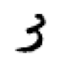

In [246]:
## Testing on 3 from validation set (1 means 3, 0 means 7)
show_image(valid_x[0].reshape(28,28))

After training, the model is tested on two examples from the validation set: one image of a 3 and one image of a 7. The model's output for each image is passed through the sigmoid function to produce a probability between 0 and 1, which is then compared to the actual label of the image (1 for 3 and 0 for 7) to evaluate the model's performance.

In [247]:
f"predicted:{sigmoid(simple_net(valid_x[0]))} , actual:{valid_y[0]}"

'predicted:tensor([0.9999], grad_fn=<ClampBackward1>) , actual:tensor([1])'

Predicted and actual are both tensors, which are arrays of numbers. In this case, the predicted tensor has a single value of 0.9999, and the actual tensor has a single value of 1. The "grad_fn" attribute indicates that this tensor is a result of a specific mathematical operation (in this case, "ClampBackward1") that has been performed on the tensor.

This suggests that the model has made a prediction of 0.9999 for a certain input and the actual output was 1. The predicted value is very close to the actual value, indicating that the model has a high level of accuracy.

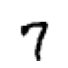

In [248]:
## Testing on 7 (1 means 3, 0 means 7)
show_image(valid_x[1206].reshape(28,28))

In [249]:
## applying sigmoid on network output

f"predicted:{sigmoid(simple_net(valid_x[1206]))} , actual:{valid_y[1206]}"

'predicted:tensor([1.8051e-06], grad_fn=<ClampBackward1>) , actual:tensor([0])'

The predicted value is a tensor (a multi-dimensional array) that represents the output of a machine learning model. It is a probability or likelihood that a given input belongs to a certain class or category. In this case, the predicted value is 1.8051e-06, which is a very small number close to zero. This means that the model is indicating a very low probability or likelihood that the input belongs to the class or category that the model is trying to predict.

The actual value is also a tensor, representing the true or correct label of the input. In this case, the actual value is 0. This means that the true or correct label of the input is 0, which is different from the predicted value given by the model.

Overall, the predicted value is a very small number close to zero, indicating that the model is not very confident that the input belongs to the class or category it is trying to predict, while the actual value is 0, which is different from the predicted value. This means that the model made an incorrect prediction.